# Importing necessary libraries


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Reading the dataset

In [5]:
df = pd.read_csv(r"C:\Users\user\Downloads\data_car.csv")

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [18]:
df.shape

(11914, 16)

# EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [25]:
df.describe(include='all')


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [27]:
#viewing categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
for col in categorical_cols:
    print(col)


Categorical Columns:
Make
Model
Engine Fuel Type
Transmission Type
Driven_Wheels
Market Category
Vehicle Size
Vehicle Style


In [29]:
#viewing categorical columns
numerical = df.select_dtypes(exclude=['object']).columns

print("numerical")
for col in numerical:
    print(col)


numerical
Year
Engine HP
Engine Cylinders
Number of Doors
highway MPG
city mpg
Popularity
MSRP


In [ ]:
#viewing unique values in each columns

In [32]:
df_unique = df.nunique()
print(df_unique)

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13108\1970029208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


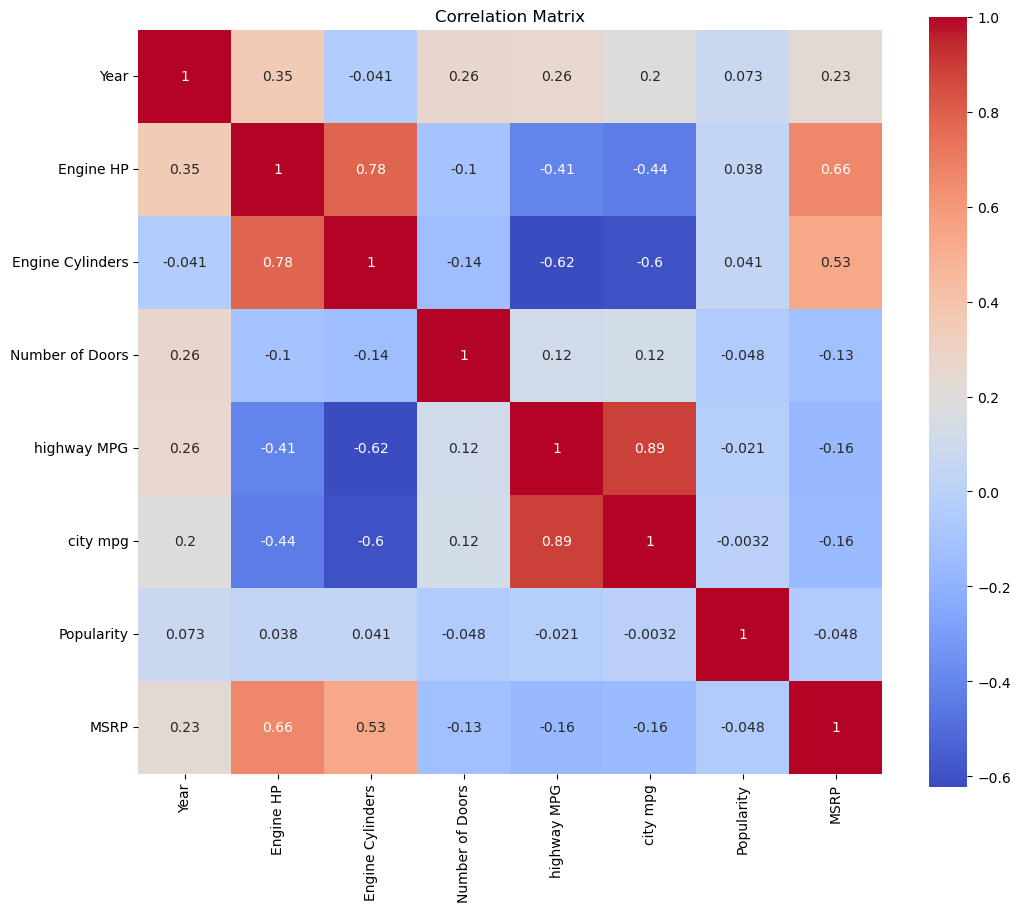

In [31]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Checking for null values 


In [14]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# looking for outliers

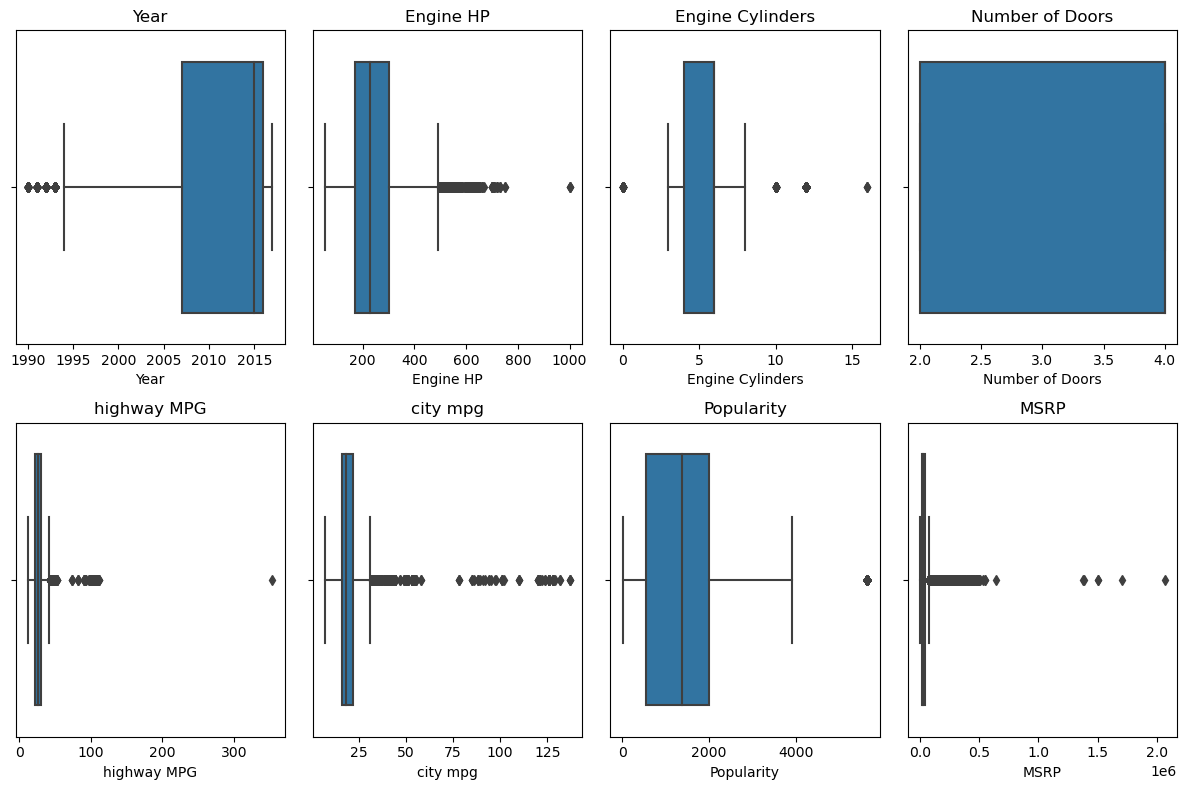

In [34]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13108\3180130895.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


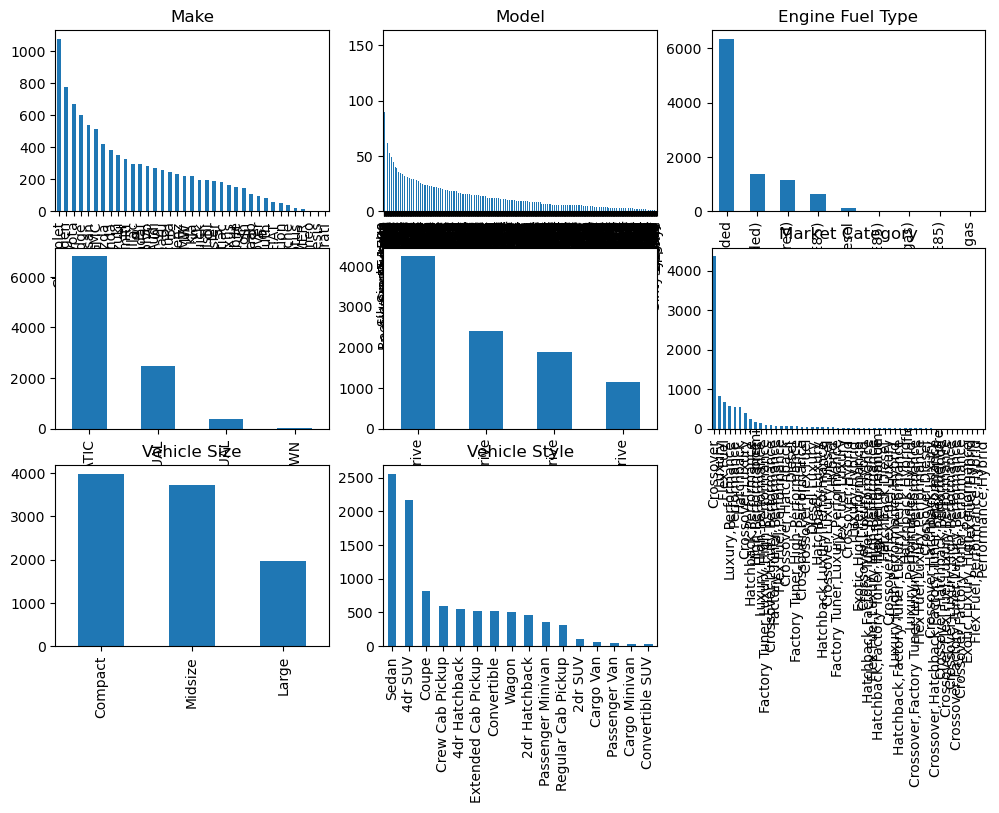

In [36]:
#categorical feature analysis
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()


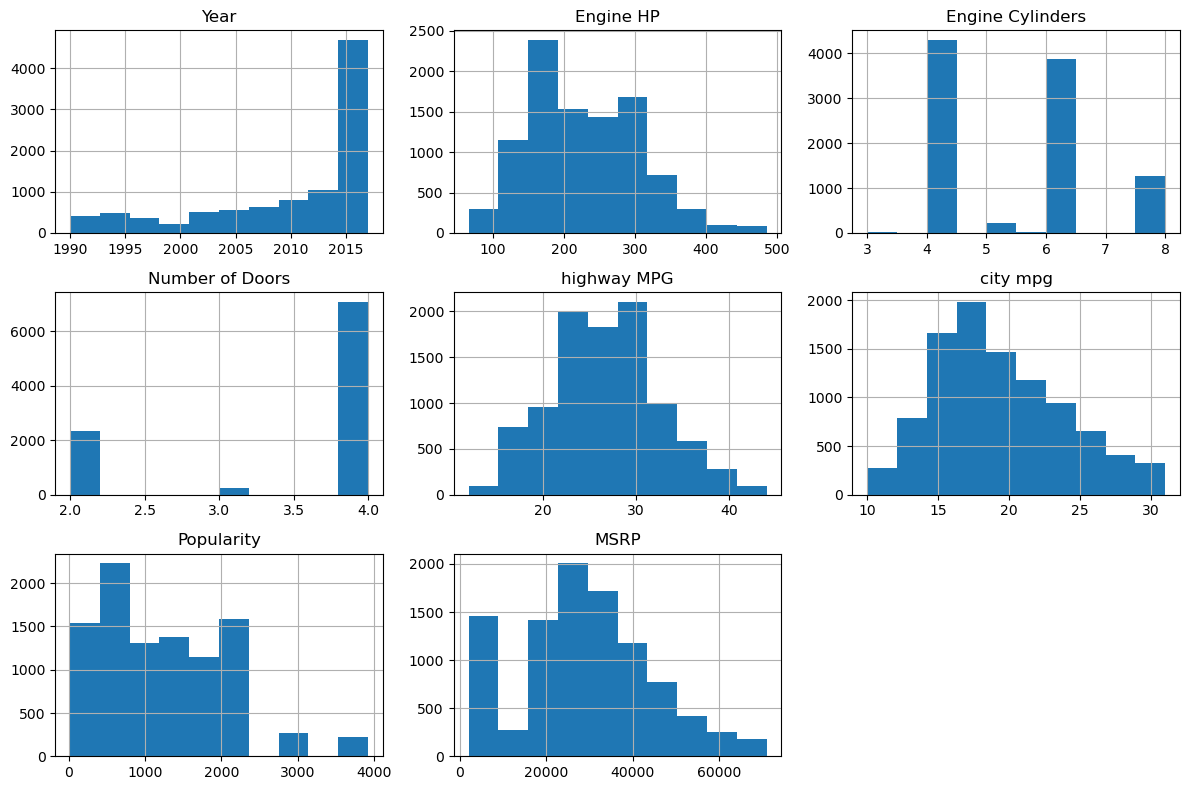

In [37]:
#numerical feature analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    df[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()


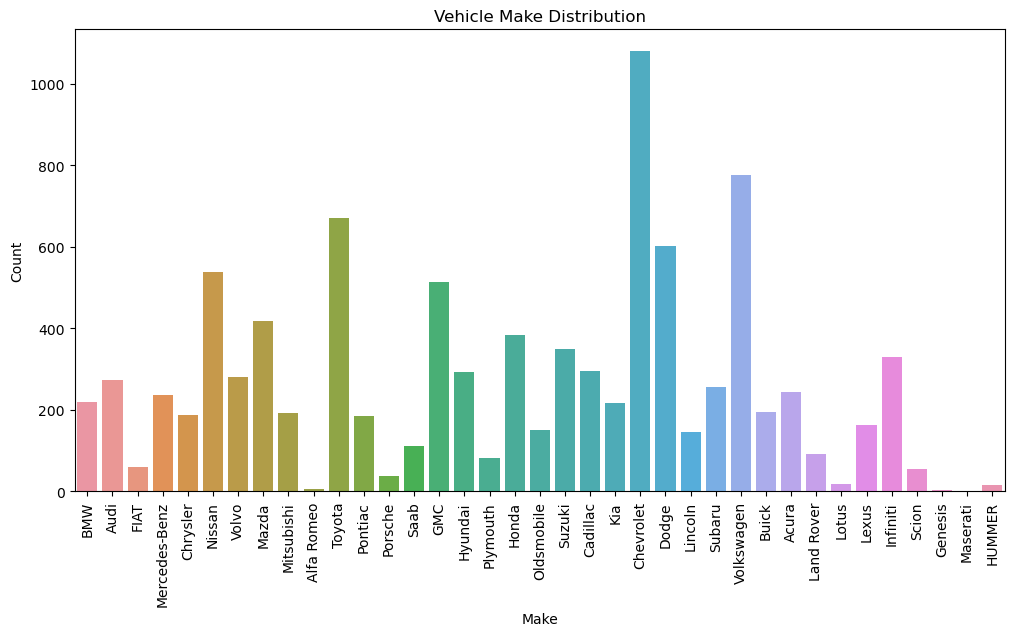

In [38]:
 #Creating a bar plot for vehicle make distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', data=df)
plt.title('Vehicle Make Distribution')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

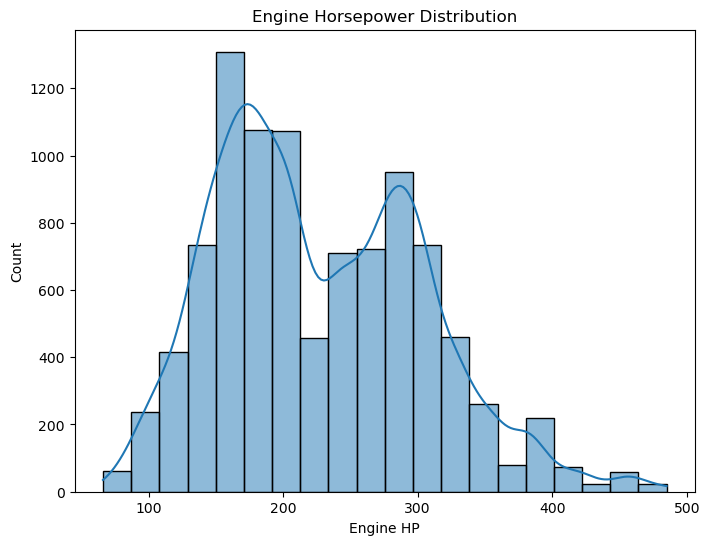

In [39]:
#2. Creating a histogram for engine horsepower distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Engine HP'], bins=20, kde=True)
plt.title('Engine Horsepower Distribution')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show()

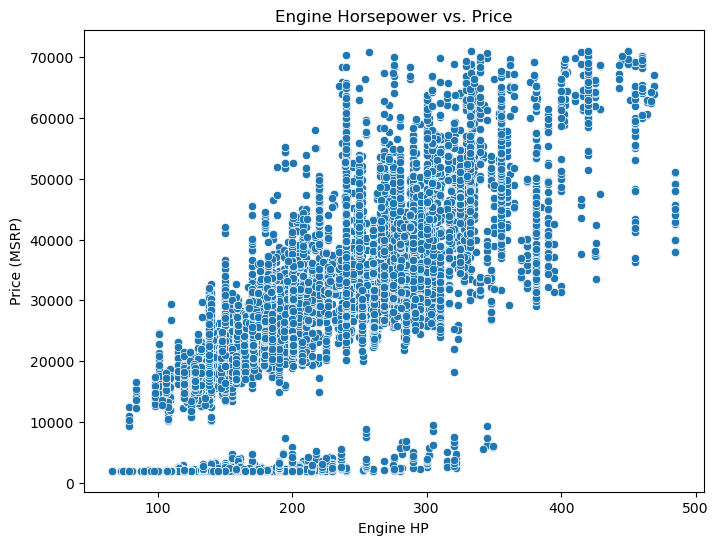

In [40]:
#2. Creating a scatter plot for engine horsepower vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=df)
plt.title('Engine Horsepower vs. Price')
plt.xlabel('Engine HP')
plt.ylabel('Price (MSRP)')
plt.show()

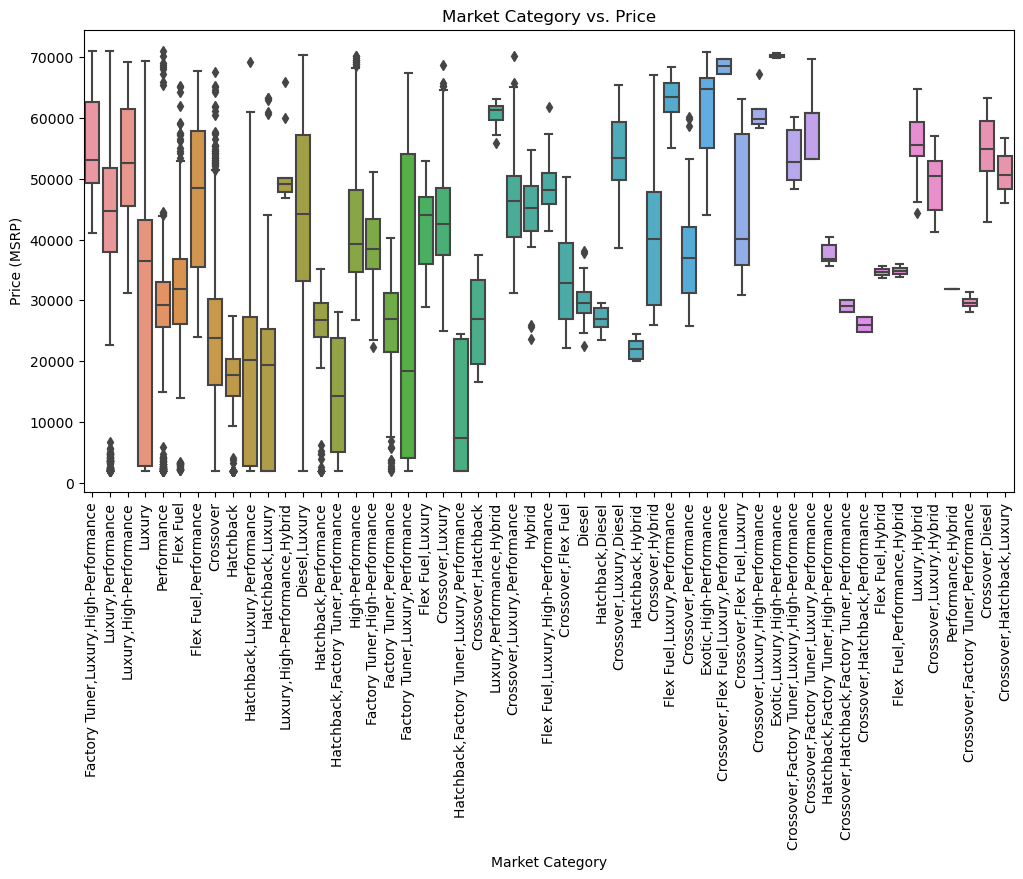

In [41]:
#2. Creating a box plot for market category vs. price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Market Category', y='MSRP', data=df)
plt.title('Market Category vs. Price')
plt.xlabel('Market Category')
plt.ylabel('Price (MSRP)')
plt.xticks(rotation=90)
plt.show()

# preprocessing

In [45]:
#dropping un necessary columns
df = df.drop('Market Category', axis=1)



In [ ]:
# we have null values in 5 columns of Engine Fuel Type, Engine HP, Engine Cylinders, 

In [46]:
#replacing null values in categorical column with  mode
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_value = df[col].mode()[0]  # Get the mode value for the column
    df[col].fillna(mode_value, inplace=True)  # Replace null values with mode value

# Verify null values after replacement
df.isna().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [47]:
#replacing null vlaues in numerical columns with mean 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    mean_value = df[col].mean()  # Get the mean value for the column
    df[col].fillna(mean_value, inplace=True)  # Replace null values with mean value

# Verify null values after replacement
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [60]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# Treating outliers

In [48]:

numerical_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

for feature in numerical_features:
    # Calculate the IQR for the feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the feature
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [61]:
# Encode categorical features
categorical_cols = ['Make', 'Model', 'Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [62]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
18,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
19,2,0,-2.261953,8,-0.691139,0.498969,1,0,4.0,2,15,20,16,3105,2000
20,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
21,2,0,-2.261953,8,-0.691139,0.498969,2,0,4.0,2,14,21,16,3105,2000


In [63]:
# Scaling
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [64]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
17,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
18,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
19,2,0,-2.261953,8,-0.691139,0.498969,1,0,4.0,2,15,20,16,3105,2000
20,2,0,-2.261953,8,-0.691139,0.498969,2,2,4.0,2,14,24,17,3105,2000
21,2,0,-2.261953,8,-0.691139,0.498969,2,0,4.0,2,14,21,16,3105,2000


# modelling

In [65]:
# Split the data into features (X) and target variable (y)
X = df.drop('MSRP', axis=1)
y = df['MSRP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Fine tuning

In [69]:
# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 10)
}

# Create the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)

In [70]:
# Print the predicted values
print(y_pred)


[32836.21295576 45207.26653242 18257.36573079 ... 34756.37095227
 37032.29659161 45263.5640823 ]


In [71]:
# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 9885921.591704749
